In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings_dec_df=pd.read_csv(r"/Users/francescoesposito/Documents/Lectures/Machine Learning/1 assignment/data/listings_sep.csv")
reviews_df=pd.read_csv(r'/Users/francescoesposito/Documents/Lectures/Machine Learning/1 assignment/data/reviews_dec.csv')

In [3]:
listings_dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              95461 non-null  int64  
 1   name                            95461 non-null  object 
 2   host_id                         95461 non-null  int64  
 3   host_name                       95455 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   95461 non-null  object 
 6   latitude                        95461 non-null  float64
 7   longitude                       95461 non-null  float64
 8   room_type                       95461 non-null  object 
 9   price                           64230 non-null  float64
 10  minimum_nights                  95461 non-null  int64  
 11  number_of_reviews               95461 non-null  int64  
 12  last_review                     

In [4]:
listings_dec_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


In [5]:
listings_dec_df.nunique()

id                                95461
name                              87944
host_id                           70852
host_name                         12501
neighbourhood_group                   0
neighbourhood                        20
latitude                          47633
longitude                         53549
room_type                             4
price                              1427
minimum_nights                      103
number_of_reviews                   592
last_review                        3245
reviews_per_month                   905
calculated_host_listings_count       95
availability_365                    366
number_of_reviews_ltm               140
license                           64627
dtype: int64

In [6]:
#dropping unnecessary columns
cols_to_drop=['name','host_name','neighbourhood_group','license']

df=listings_dec_df.drop(columns=cols_to_drop)

In [7]:
df['neighbourhood']=df['neighbourhood'].astype('string')
df['room_type']=df['room_type'].astype('string')
df['last_review']=pd.to_datetime(df['last_review'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              95461 non-null  int64         
 1   host_id                         95461 non-null  int64         
 2   neighbourhood                   95461 non-null  string        
 3   latitude                        95461 non-null  float64       
 4   longitude                       95461 non-null  float64       
 5   room_type                       95461 non-null  string        
 6   price                           64230 non-null  float64       
 7   minimum_nights                  95461 non-null  int64         
 8   number_of_reviews               95461 non-null  int64         
 9   last_review                     68319 non-null  datetime64[ns]
 10  reviews_per_month               68319 non-null  float64       
 11  ca

In [9]:
# check if columns are relevant

# Checking the unique values and their counts for each column
columns_to_check = ['neighbourhood','room_type']

for column in columns_to_check:
    print(f"Column: {column}")
    unique_values = df[column].unique()  # Get unique values
    print(f"Number of unique values: {len(unique_values)}")
    print("Unique values:")
    print(unique_values)
    print("\n")

Column: neighbourhood
Number of unique values: 20
Unique values:
<StringArray>
[     'Hôtel-de-Ville',            'Entrepôt',            'Gobelins',
              'Élysée',               'Opéra', 'Batignolles-Monceau',
   'Buttes-Montmartre',             'Reuilly',              'Temple',
           'Vaugirard',        'Ménilmontant',          'Popincourt',
     'Buttes-Chaumont',               'Passy',          'Luxembourg',
      'Palais-Bourbon',        'Observatoire',              'Louvre',
              'Bourse',            'Panthéon']
Length: 20, dtype: string


Column: room_type
Number of unique values: 4
Unique values:
<StringArray>
['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Length: 4, dtype: string




In [10]:
df.head(5)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,371299,1870265,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54
1,371862,1872631,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0
2,372879,1876396,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1
3,375434,683140,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0
4,378897,1902818,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2


9.498119650956935


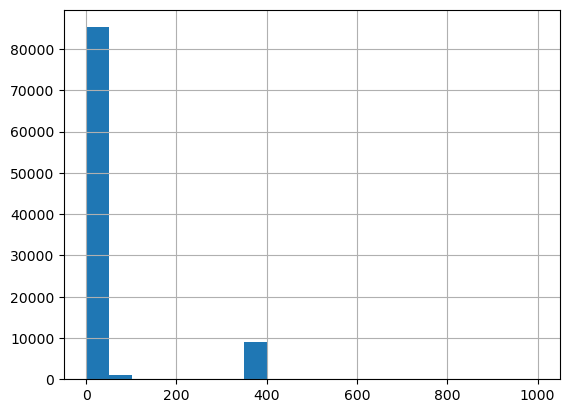

In [11]:
df['minimum_nights'].hist(bins=20)
# Percentage of listings with more than 200 minimum nights.
percentage = (df['minimum_nights'] > 200).mean() * 100
print(percentage)

In [12]:
#dropping columns where minimum nights are more than 200, considering them as long-term, thus unaffected by the Olympics

df = df[df['minimum_nights'] <= 200]

# Percentage of listings with more than 200 minimum nights.
percentage = (df['minimum_nights'] > 200).mean() * 100
print(percentage)
df.info()

0.0
<class 'pandas.core.frame.DataFrame'>
Index: 86394 entries, 0 to 95460
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              86394 non-null  int64         
 1   host_id                         86394 non-null  int64         
 2   neighbourhood                   86394 non-null  string        
 3   latitude                        86394 non-null  float64       
 4   longitude                       86394 non-null  float64       
 5   room_type                       86394 non-null  string        
 6   price                           63492 non-null  float64       
 7   minimum_nights                  86394 non-null  int64         
 8   number_of_reviews               86394 non-null  int64         
 9   last_review                     62942 non-null  datetime64[ns]
 10  reviews_per_month               62942 non-null  float64       
 11  cal

In [13]:
# Although removing 9.78% of total items, only 0.011182 (1.1%) prices were removed, thus indicating their vast majority, did not have a price.

# Checking further on Price distribution:

<Axes: ylabel='price'>

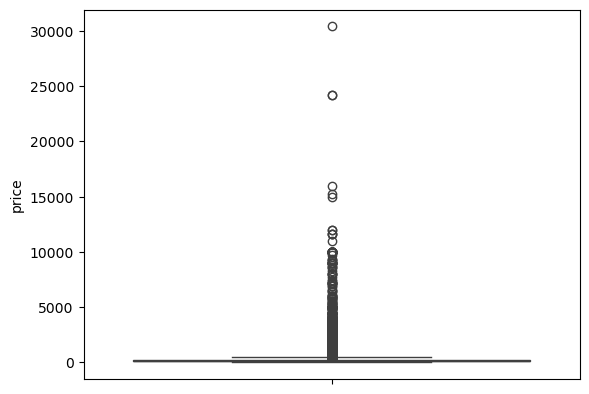

In [14]:
sns.boxplot(y=df['price'])

<Axes: >

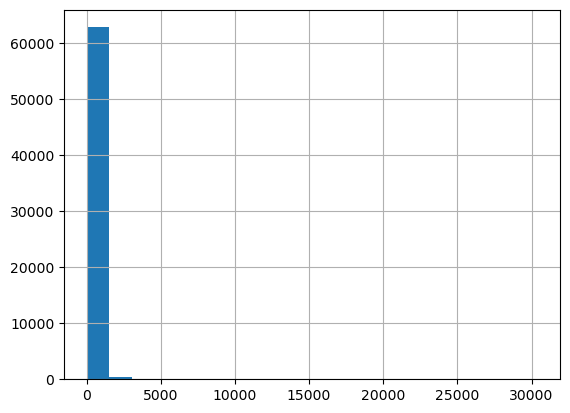

In [15]:
df['price'].hist(bins=20)

In [16]:
# Calculate the 99.95th percentile of the price column
top_9995_percentile = df['price'].quantile(0.9995)

# Filter the listings with prices in the top 0.05% percentile
top_0005_percent_prices = df[df['price'] >= top_9995_percentile]

# Print the 99.95th percentile value and the top listings
print(f"99.95th Percentile of Prices: {top_9995_percentile}")
print("Listings in the Top 0.0005% of Prices:")
print(top_0005_percent_prices[['id', 'price']].head(10))

99.95th Percentile of Prices: 9999.0
Listings in the Top 0.0005% of Prices:
             id    price
7896    8495380  10000.0
12651  15051452  24200.0
13726  17250002  10000.0
21999  29021769  12000.0
25156  34663834  10000.0
26942  37281603  12000.0
31467  44218823  10000.0
33737  49621582   9999.0
33739  49621584   9999.0
33740  49621585   9999.0


In [17]:
# Calculate the 0.005th percentile of the price column
min_0005_percentile = df['price'].quantile(0.0005)

# Filter the listings with prices in the top 0.05% percentile
min_0005_percent_prices = df[df['price'] <= min_0005_percentile]

# Print the 0.0005th percentile value and the top listings
print(f"99.95th Percentile of Prices: {min_0005_percentile}")
print("Listings in the Min 0.0005% of Prices:")
print(min_0005_percent_prices[['id', 'price']].count())

99.95th Percentile of Prices: 25.0
Listings in the Min 0.0005% of Prices:
id       40
price    40
dtype: int64


In [18]:
#check before and after the filtering
print(f"Original number of listings: {df.shape[0]}")

# Remove rows corresponding to the top 0.05% of prices
df = df[~df.index.isin(top_0005_percent_prices.index)]

print(f"Number of listings after dropping top 0.05%: {df.shape[0]}")

Original number of listings: 86394
Number of listings after dropping top 0.05%: 86327


In [19]:
#check before and after the filtering
print(f"Original number of listings: {df.shape[0]}")

# Remove rows corresponding to the top 0.05% of prices
df = df[~df.index.isin(min_0005_percent_prices.index)]

print(f"Number of listings after dropping min 0.05%: {df.shape[0]}")

Original number of listings: 86327
Number of listings after dropping min 0.05%: 86287


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86287 entries, 0 to 95460
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              86287 non-null  int64         
 1   host_id                         86287 non-null  int64         
 2   neighbourhood                   86287 non-null  string        
 3   latitude                        86287 non-null  float64       
 4   longitude                       86287 non-null  float64       
 5   room_type                       86287 non-null  string        
 6   price                           63385 non-null  float64       
 7   minimum_nights                  86287 non-null  int64         
 8   number_of_reviews               86287 non-null  int64         
 9   last_review                     62884 non-null  datetime64[ns]
 10  reviews_per_month               62884 non-null  float64       
 11  calcula

In [21]:
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             22902
minimum_nights                        0
number_of_reviews                     0
last_review                       23403
reviews_per_month                 23403
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [22]:
print("\nMissing value percentages:")
df.isnull().sum()/len(df)*100


Missing value percentages:


id                                 0.000000
host_id                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                             26.541657
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       27.122278
reviews_per_month                 27.122278
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [23]:
# Attemtping to examine possible patterns of missing data, to minimize data loss
df[(df['price'].isna()) & (df['last_review'].isna()) & (df['availability_365']==0)]

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
62,453689,2254627,Ménilmontant,48.869550,2.384750,Entire home/apt,NaN,5,0,NaT,NaN,1,0,0
70,462105,2296567,Popincourt,48.869000,2.375850,Private room,NaN,2,0,NaT,NaN,1,0,0
97,17316,67192,Entrepôt,48.871720,2.361840,Entire home/apt,NaN,3,0,NaT,NaN,1,0,0
107,25819,108444,Entrepôt,48.871510,2.357370,Private room,NaN,3,0,NaT,NaN,1,0,0
227,161703,773449,Buttes-Montmartre,48.885410,2.344950,Private room,NaN,15,0,NaT,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94490,1214287987980763942,4216889,Gobelins,48.827363,2.348881,Private room,NaN,2,0,NaT,NaN,7,0,0
94497,1214298945431125219,718576,Louvre,48.858772,2.346880,Entire home/apt,NaN,7,0,NaT,NaN,6,0,0
94499,1214308172154804808,117238503,Passy,48.851890,2.277130,Private room,NaN,1,0,NaT,NaN,34,0,0
94620,1217984959446749493,593703015,Buttes-Chaumont,48.883637,2.380549,Entire home/apt,NaN,1,0,NaT,NaN,1,0,0


Viewing the significance of the price variable, we are unable to correlate data when Null items are inplace. Thus, although dropping 27.4% of the total items, we contend the remaining 72.6% to be representative of our analysis.

In [25]:
df['price'].dropna()

0        185.0
1        250.0
2         85.0
4        110.0
5        300.0
         ...  
95456    120.0
95457     96.0
95458    110.0
95459    100.0
95460    115.0
Name: price, Length: 63385, dtype: float64

In [26]:
df=df.dropna(subset=['price'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63385 entries, 0 to 95460
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              63385 non-null  int64         
 1   host_id                         63385 non-null  int64         
 2   neighbourhood                   63385 non-null  string        
 3   latitude                        63385 non-null  float64       
 4   longitude                       63385 non-null  float64       
 5   room_type                       63385 non-null  string        
 6   price                           63385 non-null  float64       
 7   minimum_nights                  63385 non-null  int64         
 8   number_of_reviews               63385 non-null  int64         
 9   last_review                     45520 non-null  datetime64[ns]
 10  reviews_per_month               45520 non-null  float64       
 11  calcula

In [28]:
# We disregard the missing values on last_review and reviews_per_month as some listings may not have a review, which stands to reason.

In [29]:
df.head(30) 

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,371299,1870265,Hôtel-de-Ville,48.857510,2.355110,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54
1,371862,1872631,Entrepôt,48.871510,2.372190,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0
2,372879,1876396,Gobelins,48.835930,2.351080,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1
4,378897,1902818,Opéra,48.882850,2.334620,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2
5,379527,1905854,Entrepôt,48.869600,2.353070,Entire home/apt,300.0,13,6,2024-06-13,0.04,1,363,3
8,390984,1955579,Buttes-Montmartre,48.885738,2.340673,Entire home/apt,155.0,3,425,2024-09-10,2.85,3,262,57
9,391189,1956466,Reuilly,48.839210,2.400070,Private room,63.0,2,717,2024-07-03,4.81,2,54,66
10,392431,448405235,Temple,48.862870,2.365020,Entire home/apt,360.0,3,37,2024-08-18,0.27,124,55,13
11,395585,1976948,Batignolles-Monceau,48.889380,2.292010,Entire home/apt,429.0,2,57,2024-08-04,0.38,1,144,2
12,396057,1955579,Temple,48.862600,2.362050,Entire home/apt,45.0,30,23,2024-08-14,0.15,3,80,5


In [30]:
#grouping the data

grouped_df = df.groupby('neighbourhood').agg(
    average_price=('price', 'mean'),
    average_other_minimum_nights=('minimum_nights', 'mean'))

grouped_df.head(20)

,average_price,average_other_minimum_nights
neighbourhood,,
Batignolles-Monceau,247.233787,7.087075
Bourse,245.798077,6.586120
Buttes-Chaumont,168.965134,4.838939
Buttes-Montmartre,175.103896,5.329682
Entrepôt,206.329202,5.147744
Gobelins,177.613951,5.562828
Hôtel-de-Ville,275.448058,9.645631
Louvre,320.952801,7.094399
Luxembourg,329.862157,9.522889


Importing the calendar csv, in order to link the prices given in this dataset, broken down into months. Doing so will allow us to seperate the months, and thus see the before-during-after relation of price.

In [32]:
calendar=pd.read_csv(r"/Users/francescoesposito/Documents/Lectures/Machine Learning/1 assignment/data/calendar.csv")

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/2023209891.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar=pd.read_csv(r"/Users/francescoesposito/Documents/Lectures/Machine Learning/1 assignment/data/calendar.csv")


In [33]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2024-03-19,f,$250.00,NaN,2.0,30.0
1,3109,2024-03-20,t,$250.00,NaN,2.0,30.0
2,3109,2024-03-21,t,$250.00,NaN,2.0,30.0
3,3109,2024-03-22,t,$250.00,NaN,2.0,30.0
4,3109,2024-03-23,t,$250.00,NaN,2.0,30.0


In [34]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ GB


In [35]:
#drop unnecessary columns
calendar= calendar.drop(columns=['adjusted_price','minimum_nights','maximum_nights','available'])

calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [36]:
calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   date        object 
 2   price       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 705.1+ MB


In [37]:
calendar['date']=pd.to_datetime(calendar['date'])

In [38]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 705.1 MB


In [39]:
calendar.head()

,listing_id,date,price
0,3109,2024-03-19,250.0
1,3109,2024-03-20,250.0
2,3109,2024-03-21,250.0
3,3109,2024-03-22,250.0
4,3109,2024-03-23,250.0


In [40]:
#select only summer months (june, july, august)
calendar = calendar[(calendar['date'].dt.month.isin([6, 7, 8])) & (calendar['date'].dt.year == 2024)]

In [41]:
calendar.head()

,listing_id,date,price
74,3109,2024-06-01,250.0
75,3109,2024-06-02,250.0
76,3109,2024-06-03,250.0
77,3109,2024-06-04,250.0
78,3109,2024-06-05,250.0


In [42]:
calendar['month'] = calendar['date'].dt.month

#grouping by id and month and then calculating the average price
avg_prices = calendar.groupby(['listing_id', 'month'])['price'].mean().reset_index()

#pivoting the  table
avg_prices_pivot = avg_prices.pivot(index='listing_id', columns='month', values='price')

#change name
avg_prices_pivot = avg_prices_pivot.rename(columns={6: 'June_avg_price', 7: 'July_avg_price', 8: 'August_avg_price'})
avg_prices_pivot.columns.name = None #delete the name of the index

#reset the index to get listing_id as a column
avg_prices_pivot = avg_prices_pivot.reset_index()

avg_prices_pivot.head(10)


,listing_id,June_avg_price,July_avg_price,August_avg_price
0,3109,250.0,250.0,250.0
1,5396,150.0,150.0,150.0
2,7397,130.0,130.0,130.0
3,7964,180.0,180.0,180.0
4,9359,75.0,75.0,75.0
5,9952,80.0,80.0,80.0
6,10586,80.0,80.0,80.0
7,10588,75.0,75.0,75.0
8,11265,145.0,145.0,145.0
9,11487,60.0,60.0,60.0


In [43]:
#merge the listing dataframe and the one just created
combined_df = df.merge(avg_prices_pivot, left_on='id', right_on='listing_id', how='inner')

#drop the duplicate 'listing_id' column 
combined_df = combined_df.drop(columns=['listing_id'])

combined_df.head()


,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,371299,1870265,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,195.0,195.0,195.0
1,371862,1872631,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,250.0,250.0,250.0
2,372879,1876396,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,80.0,80.0,80.0
3,378897,1902818,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,80.0,80.0,80.0
4,379527,1905854,Entrepôt,48.86960,2.35307,Entire home/apt,300.0,13,6,2024-06-13,0.04,1,363,3,331.0,331.0,331.0


In [44]:
#changing columns in numeric format and dropping unnecessary columns
numeric_df = combined_df.select_dtypes(include=[np.number])

numeric_df=numeric_df.drop(columns=['id','host_id','latitude','longitude'])
numeric_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,185.0,3,601,3.97,3,307,54,195.0,195.0,195.0
1,250.0,4,50,0.34,1,9,0,250.0,250.0,250.0
2,85.0,30,171,2.01,3,151,1,80.0,80.0,80.0
3,110.0,3,28,0.19,1,6,2,80.0,80.0,80.0
4,300.0,13,6,0.04,1,363,3,331.0,331.0,331.0


In [45]:
#Calculating mean, variance and sd

for col_name in numeric_df.columns:
    column = numeric_df[col_name].tolist() # Convert column to list
    
    # Calculate mean
    total = 0
    n = len(column)
    for value in column:
        total += value
    mean = total / n
    
    # Calculate variance
    squared_diff_sum = 0
    for value in column:
        diff = value - mean
        squared_diff = diff * diff
        squared_diff_sum += squared_diff
    variance = squared_diff_sum / n
    
    # Calculate standard deviation
    std = variance ** 0.5

    #print results
    print(f"\n{col_name}:")
    print(f"Mean: {mean:.6f}")
    print(f"Variance: {variance:.6f}")
    print(f"Standard Deviation: {std:.6f}")


price:
Mean: 253.886880
Variance: 138345.428929
Standard Deviation: 371.948154

minimum_nights:
Mean: 6.991865
Variance: 208.309906
Standard Deviation: 14.432945

number_of_reviews:
Mean: 35.267816
Variance: 5087.706346
Standard Deviation: 71.328160

reviews_per_month:
Mean: nan
Variance: nan
Standard Deviation: nan

calculated_host_listings_count:
Mean: 33.041438
Variance: 13134.709956
Standard Deviation: 114.606762

availability_365:
Mean: 186.219101
Variance: 14660.770136
Standard Deviation: 121.081667

number_of_reviews_ltm:
Mean: 9.703377
Variance: 234.253459
Standard Deviation: 15.305341

June_avg_price:
Mean: 321.418866
Variance: 1062187.633265
Standard Deviation: 1030.624875

July_avg_price:
Mean: 322.288862
Variance: 1071355.991551
Standard Deviation: 1035.063279

August_avg_price:
Mean: 322.632092
Variance: 1077712.724395
Standard Deviation: 1038.129435


In [46]:
# Loop through each pair of columns
for col1 in numeric_df.columns:
    column1 = numeric_df[col1].tolist()  # Convert first column to list
    
    # Calculate mean of first column
    total1 = 0
    n = len(column1)
    for value in column1:
        total1 += value
    mean1 = total1 / n
    
    for col2 in numeric_df.columns:
        column2 = numeric_df[col2].tolist()  # Convert second column to list
        
        # Calculate mean of second column
        total2 = 0
        for value in column2:
            total2 += value
        mean2 = total2 / n
        
        # Calculate covariance
        sum_of_products = 0
        for i in range(n):
            diff1 = column1[i] - mean1
            diff2 = column2[i] - mean2
            product = diff1 * diff2
            sum_of_products += product
        covariance = sum_of_products / n
        
        # Calculate std for correlation
        squared_diff_sum1 = 0
        squared_diff_sum2 = 0
        for i in range(n):
            diff1 = column1[i] - mean1
            diff2 = column2[i] - mean2
            squared_diff_sum1 += diff1 * diff1
            squared_diff_sum2 += diff2 * diff2
        std1 = (squared_diff_sum1 / n) ** 0.5
        std2 = (squared_diff_sum2 / n) ** 0.5
        
        # Calculate correlation
        correlation = covariance / (std1 * std2)
        
        print(f"\n{col1} and {col2}:")
        print(f"Covariance: {covariance:.6f}")
        print(f"Correlation: {correlation:.6f}")


price and price:
Covariance: 138345.428929
Correlation: 1.000000

price and minimum_nights:
Covariance: -362.573772
Correlation: -0.067540

price and number_of_reviews:
Covariance: -2072.095826
Correlation: -0.078103

price and reviews_per_month:
Covariance: nan
Correlation: nan

price and calculated_host_listings_count:
Covariance: -531.964698
Correlation: -0.012479

price and availability_365:
Covariance: 4030.000219
Correlation: 0.089484

price and number_of_reviews_ltm:
Covariance: -632.925834
Correlation: -0.111180

price and June_avg_price:
Covariance: 129337.212701
Correlation: 0.337396

price and July_avg_price:
Covariance: 132326.203862
Correlation: 0.343713

price and August_avg_price:
Covariance: 133782.740315
Correlation: 0.346470

minimum_nights and price:
Covariance: -362.573772
Correlation: -0.067540

minimum_nights and minimum_nights:
Covariance: 208.309906
Correlation: 1.000000

minimum_nights and number_of_reviews:
Covariance: -121.077638
Correlation: -0.117611

mini

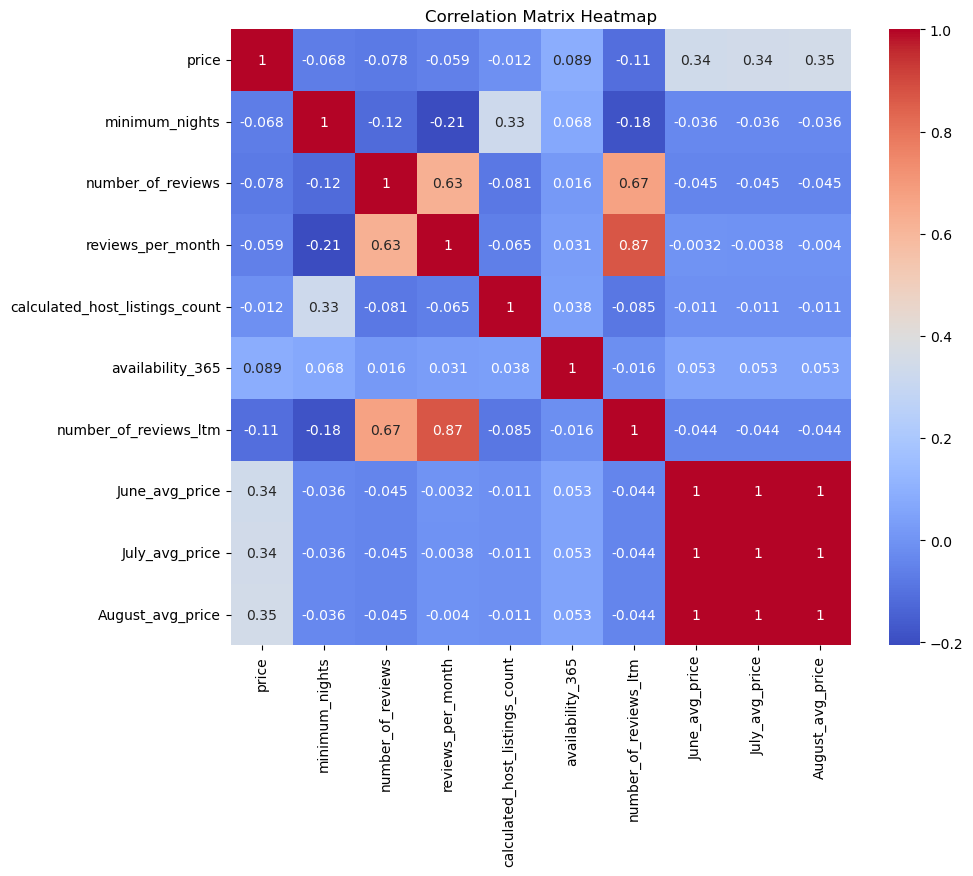

In [47]:
#coorelation matrix with different features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

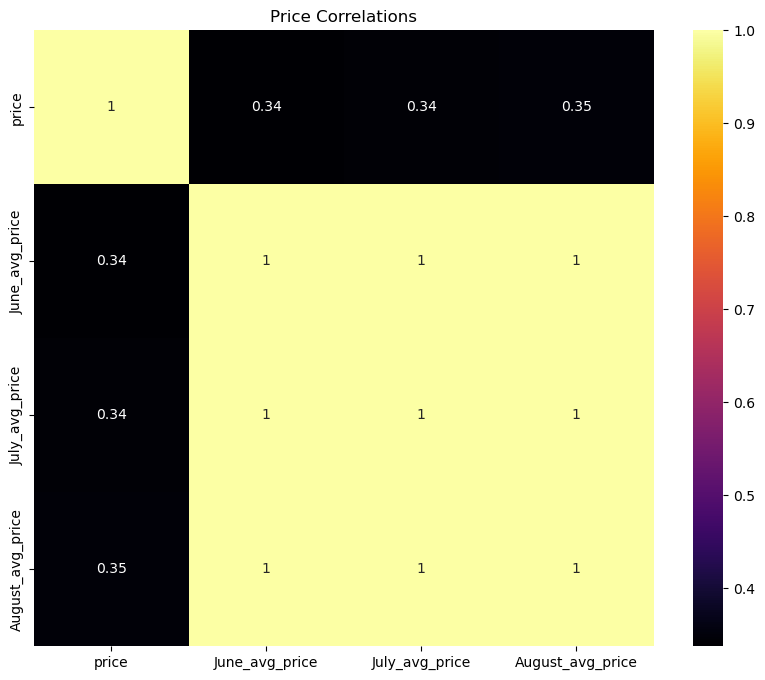

In [48]:
#correlation map for prices 
prices_only=numeric_df[['price','June_avg_price','July_avg_price','August_avg_price']]
plt.figure(figsize=(10, 8))
sns.heatmap(prices_only.corr(), 
            annot=True, 
            cmap='inferno')
plt.title('Price Correlations')
plt.show()

In [49]:
neighbourhood_grouped = combined_df[['neighbourhood','price','reviews_per_month','availability_365','minimum_nights']]
neighbourhood_grouped.head(5)

,neighbourhood,price,reviews_per_month,availability_365,minimum_nights
0,Hôtel-de-Ville,185.0,3.97,307,3
1,Entrepôt,250.0,0.34,9,4
2,Gobelins,85.0,2.01,151,30
3,Opéra,110.0,0.19,6,3
4,Entrepôt,300.0,0.04,363,13


In [50]:
neighbourhood_grouped['neighbourhood'].nunique()

20

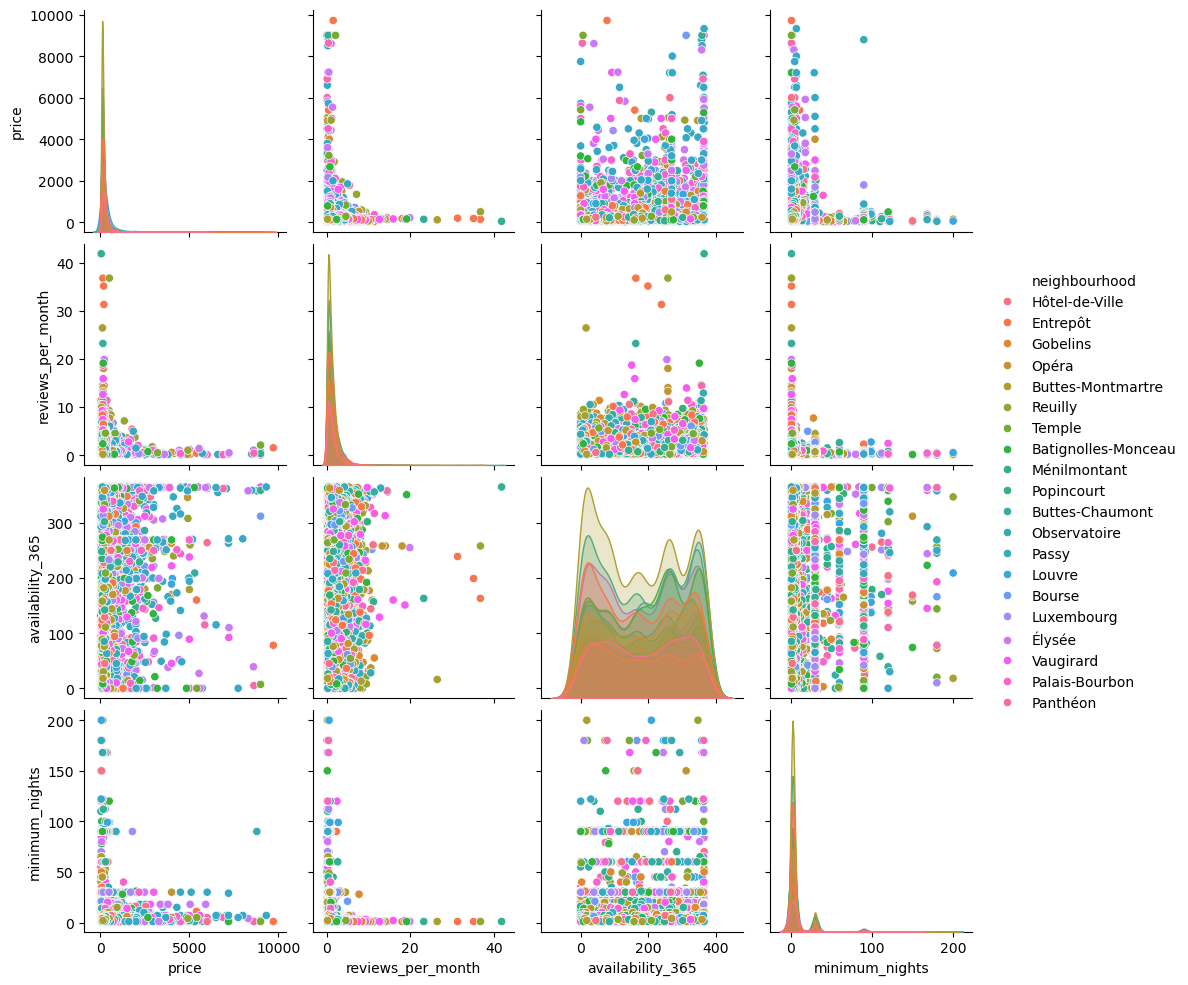

In [51]:
#pair plot on neighbourhoods
sns.pairplot(neighbourhood_grouped, hue='neighbourhood')
plt.show()

In [52]:
import pandas as pd

#create neighborhoods lists
central_paris = ["Hôtel-de-Ville", "Louvre", "Palais-Bourbon", "Bourse", "Opéra", "Panthéon"]
north_paris = ["Buttes-Montmartre", "Batignolles-Monceau", "Élysée"]
east_paris = ["Popincourt", "Buttes-Chaumont", "Ménilmontant", "Temple", "Entrepôt"]
west_paris = ["Passy", "Luxembourg"]
south_paris = ["Gobelins", "Observatoire", "Vaugirard", "Reuilly"]

#define a function to assign region
def assign_region(neighbourhood):
    if neighbourhood in central_paris:
        return 'Central Paris'
    elif neighbourhood in north_paris:
        return 'North Paris'
    elif neighbourhood in east_paris:
        return 'East Paris'
    elif neighbourhood in west_paris:
        return 'West Paris'
    elif neighbourhood in south_paris:
        return 'South Paris'

#apply the function to create the region column
neighbourhood_grouped['Region'] = neighbourhood_grouped['neighbourhood'].apply(assign_region)

#display unique neighborhoods and their counts
unique_neighbourhoods = neighbourhood_grouped['neighbourhood'].value_counts().reset_index()
unique_neighbourhoods.columns = ['neighbourhood', 'Count']
print("Unique Neighbourhoods with Counts:\n", unique_neighbourhoods)

#group by region and aggregate neighborhoods in lists
grouped_data = neighbourhood_grouped.groupby('Region').agg(list).reset_index()
print("\nGrouped Data by Region:\n", grouped_data)


Unique Neighbourhoods with Counts:
           neighbourhood  Count
0     Buttes-Montmartre   4368
1            Popincourt   3589
2             Vaugirard   3253
3                 Passy   3049
4   Batignolles-Monceau   2931
5              Entrepôt   2844
6                 Opéra   2178
7       Buttes-Chaumont   2175
8          Ménilmontant   2106
9                Temple   2087
10               Bourse   1713
11              Reuilly   1619
12               Élysée   1611
13         Observatoire   1522
14       Hôtel-de-Ville   1508
15             Panthéon   1400
16           Luxembourg   1384
17       Palais-Bourbon   1329
18             Gobelins   1314
19               Louvre   1169

Grouped Data by Region:
           Region                                      neighbourhood  \
0  Central Paris  [Hôtel-de-Ville, Opéra, Hôtel-de-Ville, Hôtel-...   
1     East Paris  [Entrepôt, Entrepôt, Temple, Temple, Temple, E...   
2    North Paris  [Buttes-Montmartre, Batignolles-Monceau, Butte...   
3  

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/1255831262.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_grouped['Region'] = neighbourhood_grouped['neighbourhood'].apply(assign_region)


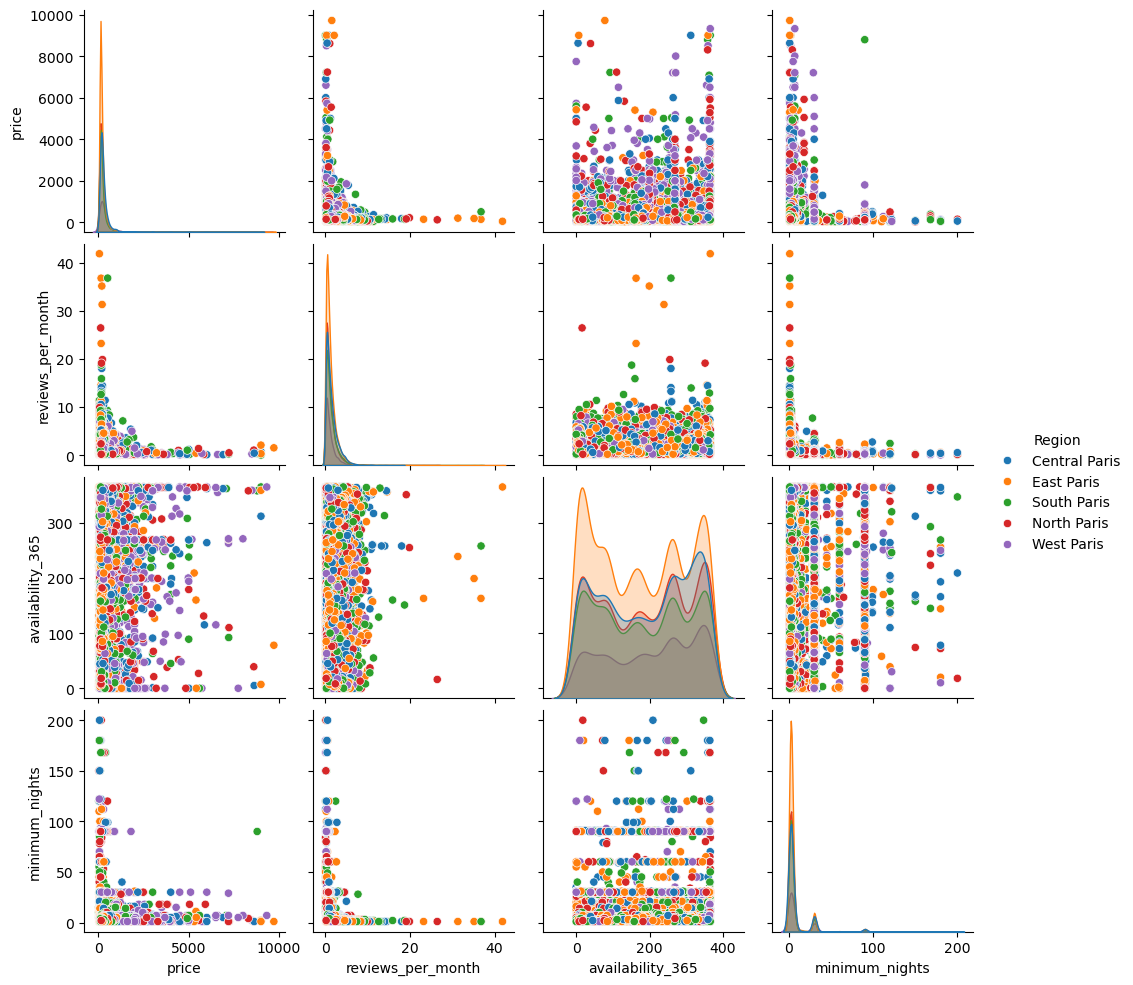

In [53]:
sns.pairplot(neighbourhood_grouped, hue='Region')

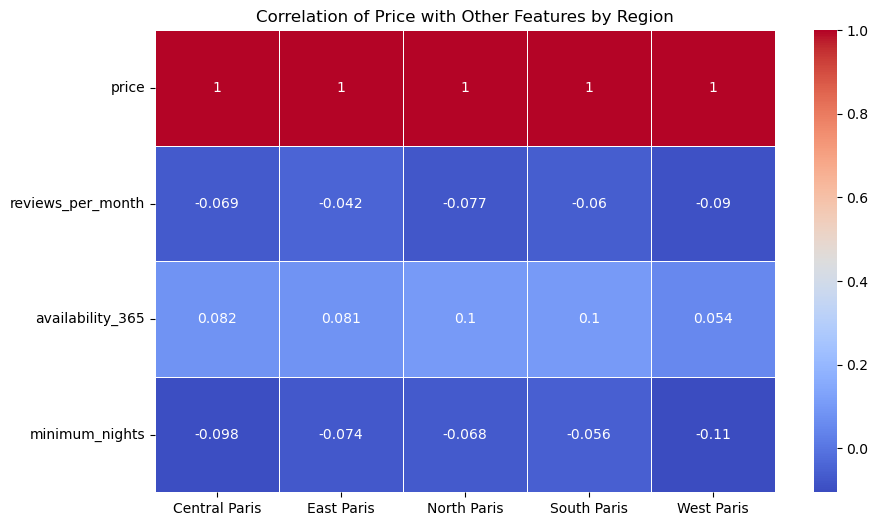

In [54]:
# Create an empty DataFrame to store correlations by region
correlation_by_region = pd.DataFrame()

# Iterate through each region and compute correlations with 'price'
for region, data in neighbourhood_grouped.groupby('Region'):
    #select numeric columns only
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    #compute correlation with price
    correlation_data = numeric_data.corr()[['price']].rename(columns={'price': region})
    correlation_by_region = pd.concat([correlation_by_region, correlation_data], axis=1)

#plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_by_region, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Price with Other Features by Region')
plt.show()


In [55]:
#apply the region assignment
combined_df['Region'] = combined_df['neighbourhood'].apply(assign_region)

#group by region and calculate average price and count per region
region_summary = combined_df.groupby('Region').agg(
    average_price=('price', 'mean'),
    count=('price', 'count')
).reset_index()

region_summary

,Region,average_price,count
0,Central Paris,292.576530,9297
1,East Paris,201.927740,12801
2,North Paris,247.303255,8910
3,South Paris,223.915672,7708
4,West Paris,388.132190,4433


/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/3093467120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='average_price', data=region_summary, palette='Set2')


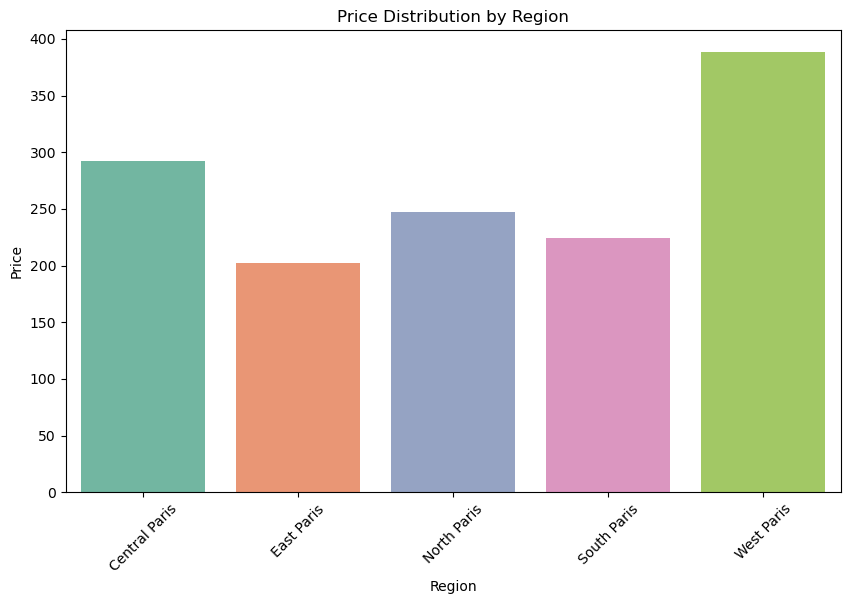

In [56]:
#create a box plot for price distribution by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='average_price', data=region_summary, palette='Set2')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Question 2

In [58]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

X = neighbourhood_grouped[["price", 'availability_365']]
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [59]:
neighbourhood_grouped['cluster'] = km.labels_
neighbourhood_grouped.head()

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/3770374513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_grouped['cluster'] = km.labels_


,neighbourhood,price,reviews_per_month,availability_365,minimum_nights,Region,cluster
0,Hôtel-de-Ville,185.0,3.97,307,3,Central Paris,2
1,Entrepôt,250.0,0.34,9,4,East Paris,2
2,Gobelins,85.0,2.01,151,30,South Paris,2
3,Opéra,110.0,0.19,6,3,Central Paris,2
4,Entrepôt,300.0,0.04,363,13,East Paris,2


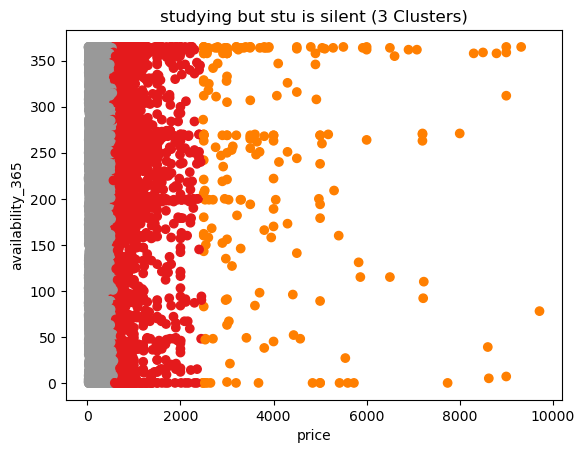

In [60]:
plt.scatter(X["price"], X["availability_365"], c=km.labels_, cmap = 'Set1')
plt.xlabel("price")
plt.ylabel("availability_365")
plt.title("studying but stu is silent (3 Clusters)")
plt.show()

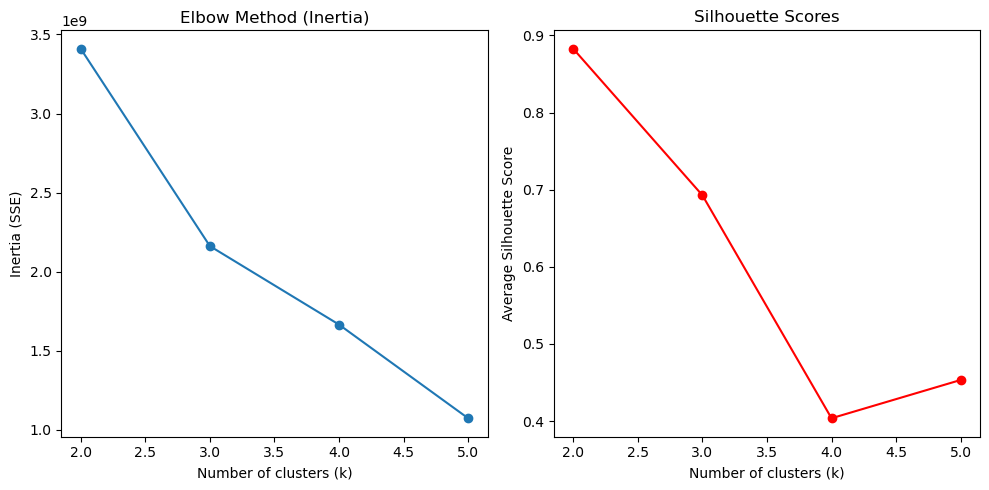

In [61]:
import numpy as np
from sklearn.metrics import silhouette_score

def plot_elbow_silhouette(X, k_min=2, k_max=5):
    """
    Plots the 'Elbow' (inertia) curve and the Silhouette scores 
    for K-Means clustering over a range of cluster counts.

    Parameters:
    -----------
    X : pandas DataFrame or NumPy array
        The input data to cluster. (Rows = samples, Columns = features)
    k_min : int, optional
        The lower bound of the cluster range (inclusive). Default=2.
    k_max : int, optional
        The upper bound of the cluster range (inclusive). Default=10.
    """
    # Lists to store metrics for each k
    inertias = []      
    silhouettes = []   

    # Range of k values
    ks = range(k_min, k_max + 1)

    for k in ks:
        # Instantiate and fit K-Means
        km = KMeans(n_clusters=k, random_state=1)
        labels = km.fit_predict(X)

        # Store the inertia (SSE)
        inertias.append(km.inertia_)

        # Silhouette score (only valid for k > 1)
        s_score = silhouette_score(X, labels)
        silhouettes.append(s_score)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the Elbow curve
    axes[0].plot(ks, inertias, marker='o')
    axes[0].set_title("Elbow Method (Inertia)")
    axes[0].set_xlabel("Number of clusters (k)")
    axes[0].set_ylabel("Inertia (SSE)")

    # Plot the Silhouette scores
    axes[1].plot(ks, silhouettes, marker='o', color='red')
    axes[1].set_title("Silhouette Scores")
    axes[1].set_xlabel("Number of clusters (k)")
    axes[1].set_ylabel("Average Silhouette Score")

    plt.tight_layout()
    plt.show() 


plot_elbow_silhouette(X, k_min=2, k_max=5)


In [62]:
combined_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price,Region
0,371299,1870265,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,195.0,195.0,195.0,Central Paris
1,371862,1872631,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,250.0,250.0,250.0,East Paris
2,372879,1876396,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,80.0,80.0,80.0,South Paris
3,378897,1902818,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,80.0,80.0,80.0,Central Paris
4,379527,1905854,Entrepôt,48.86960,2.35307,Entire home/apt,300.0,13,6,2024-06-13,0.04,1,363,3,331.0,331.0,331.0,East Paris


In [63]:
S = combined_df[["price", "number_of_reviews",'availability_365']]
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [64]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [65]:
combined_df['cluster'] = km.labels_
combined_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price,Region,cluster
0,371299,1870265,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,195.0,195.0,195.0,Central Paris,2
1,371862,1872631,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,250.0,250.0,250.0,East Paris,2
2,372879,1876396,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,80.0,80.0,80.0,South Paris,2
3,378897,1902818,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,80.0,80.0,80.0,Central Paris,2
4,379527,1905854,Entrepôt,48.86960,2.35307,Entire home/apt,300.0,13,6,2024-06-13,0.04,1,363,3,331.0,331.0,331.0,East Paris,2


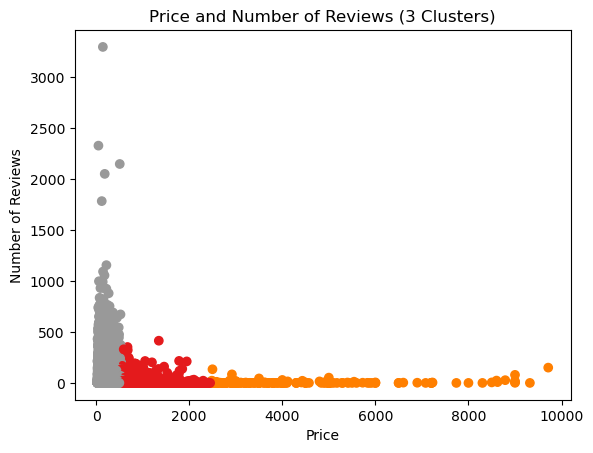

In [66]:
plt.scatter(S["price"], S["number_of_reviews"], c=km.labels_, cmap = 'Set1')
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("Price and Number of Reviews (3 Clusters)")
plt.show()

In [67]:
W = neighbourhood_grouped[["price"]]  

km = KMeans(n_clusters=5, random_state=1)
km.fit(W)  

neighbourhood_grouped['cluster'] = km.labels_

#check
print(neighbourhood_grouped.head())

    neighbourhood  price  reviews_per_month  availability_365  minimum_nights  \
0  Hôtel-de-Ville  185.0               3.97               307               3   
1        Entrepôt  250.0               0.34                 9               4   
2        Gobelins   85.0               2.01               151              30   
3           Opéra  110.0               0.19                 6               3   
4        Entrepôt  300.0               0.04               363              13   

          Region  cluster  
0  Central Paris        4  
1     East Paris        0  
2    South Paris        4  
3  Central Paris        4  
4     East Paris        0  


/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/607616229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_grouped['cluster'] = km.labels_


/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/3778600211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['neighbourhood_encoded'] = neighbourhood_encoder.fit_transform(neighbourhood_grouped['neighbourhood'])


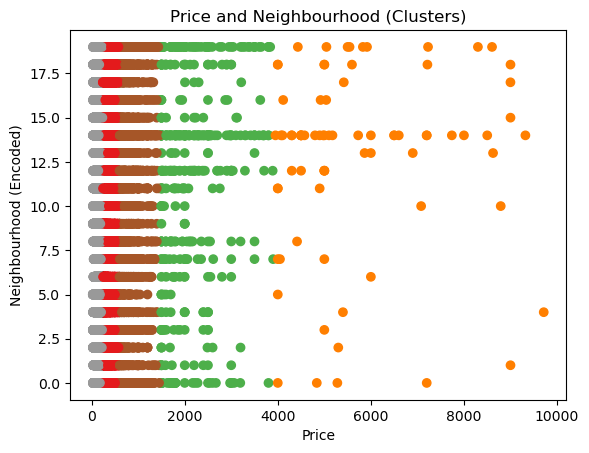

In [68]:
from sklearn.preprocessing import LabelEncoder

#encoding neighborhoods to perform clustering
neighbourhood_encoder = LabelEncoder()
W['neighbourhood_encoded'] = neighbourhood_encoder.fit_transform(neighbourhood_grouped['neighbourhood'])

plt.scatter(W["price"], W["neighbourhood_encoded"], c=km.labels_, cmap='Set1')
plt.xlabel("Price")
plt.ylabel("Neighbourhood (Encoded)")
plt.title("Price and Neighbourhood (Clusters)")
plt.show()

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_3499/3464384505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['region_encoded'] = neighbourhood_encoder.fit_transform(neighbourhood_grouped['Region'])


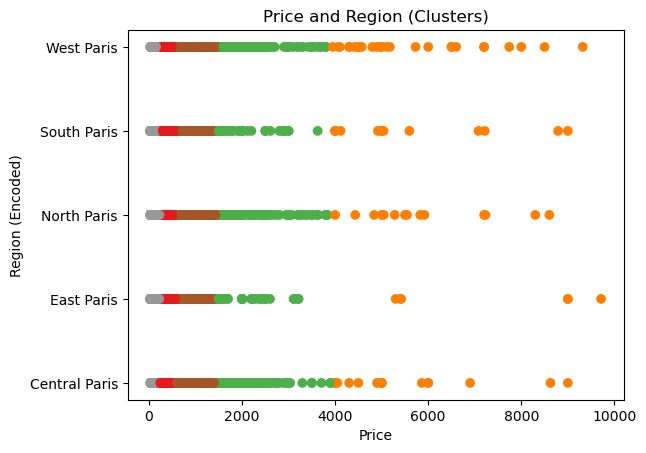

In [69]:
#encoding regions. The reasoning is the same as previous graph but using regions instead of neighborhoods.
#doing so ensures more clarity for the reader as there are less lines and they can be labelled
W['region_encoded'] = neighbourhood_encoder.fit_transform(neighbourhood_grouped['Region'])
region_names = neighbourhood_encoder.classes_

plt.scatter(W["price"], W["region_encoded"], c=km.labels_, cmap='Set1')
plt.xlabel("Price")
plt.ylabel("Region (Encoded)")
plt.title("Price and Region (Clusters)")
plt.yticks(ticks=range(len(region_names)), labels=region_names)

plt.show()

# Question 3

In [71]:
from sklearn.decomposition import PCA

#define the features
S = neighbourhood_grouped[['cluster', 'availability_365', 'minimum_nights']] 

#define the target column
T = neighbourhood_grouped['price']  # or any other target column

pca = PCA(n_components=2)
S_pca = pca.fit_transform(S)



In [72]:
pca = PCA(n_components=2)

X_r = pca.fit(S).transform(S)

In [73]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.98586526 0.01394374]


In [74]:
combined_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price,Region,cluster
0,371299,1870265,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,195.0,195.0,195.0,Central Paris,2
1,371862,1872631,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,250.0,250.0,250.0,East Paris,2
2,372879,1876396,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,80.0,80.0,80.0,South Paris,2
3,378897,1902818,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,80.0,80.0,80.0,Central Paris,2
4,379527,1905854,Entrepôt,48.86960,2.35307,Entire home/apt,300.0,13,6,2024-06-13,0.04,1,363,3,331.0,331.0,331.0,East Paris,2


In [77]:
#define the features
S1 = combined_df[['number_of_reviews', 'availability_365', 'minimum_nights', 'calculated_host_listings_count']] 

#define the target column
T1 = combined_df['price']  # or any other target column

S_pca = pca.fit_transform(S)

In [79]:
pca = PCA(n_components=3)

X_r = pca.fit(S1).transform(S1)

In [81]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.44809451 0.39431357 0.15205549]


In [87]:
#check how much each original feature contributes to each principal component
feature_names = S1.columns
pca_components = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("\nPCA Components:\n", pca_components)


PCA Components:
      number_of_reviews  availability_365  minimum_nights  \
PC1          -0.007365          0.952815        0.018990   
PC2          -0.084511         -0.302908        0.037987   
PC3           0.996206         -0.018518       -0.016092   

     calculated_host_listings_count  
PC1                        0.302868  
PC2                        0.948505  
PC3                        0.083492  
